# %rest usage example

## Load

In [1]:
%load_ext restmagic

##  Line magic

Arguments of the command are HTTP method and URL.

In [2]:
result = %rest GET https://httpbin.org/json

{
  "slideshow": {
    "author": "Yours Truly",
    "date": "date of publication",
    "slides": [
      {
        "title": "Wake up to WonderWidgets!",
        "type": "all"
      },
      {
        "items": [
          "Why <em>WonderWidgets</em> are great",
          "Who <em>buys</em> WonderWidgets"
        ],
        "title": "Overview",
        "type": "all"
      }
    ],
    "title": "Sample Slide Show"
  }
}

The comand output is a `Response` object of the `requests` library.

In [3]:
type(result)

requests.models.Response

In [4]:
result.json()['slideshow']['title']

'Sample Slide Show'

In [5]:
ua_result = %rest GET http://httpbin.org/user-agent

{
  "user-agent": "python-requests/2.19.1"
}

## Display options

    --verbose, -v  Dump full HTTP session log.
    --quiet, -q     Do not print HTTP request and response.

In [6]:
%rest -q GET https://httpbin.org/json

<Response [200]>

In [7]:
%rest -v GET https://httpbin.org/json

< GET /json HTTP/1.1
< Host: httpbin.org
< User-Agent: python-requests/2.19.1
< Accept-Encoding: gzip, deflate
< Accept: */*
< Connection: keep-alive
< 

> HTTP/1.1 200 OK
> Connection: keep-alive
> Server: gunicorn/19.9.0
> Date: Fri, 14 Sep 2018 08:54:48 GMT
> Content-Type: application/json
> Content-Length: 429
> Access-Control-Allow-Origin: *
> Access-Control-Allow-Credentials: true
> Via: 1.1 vegur
> 
{
  "slideshow": {
    "author": "Yours Truly", 
    "date": "date of publication", 
    "slides": [
      {
        "title": "Wake up to WonderWidgets!", 
        "type": "all"
      }, 
      {
        "items": [
          "Why <em>WonderWidgets</em> are great", 
          "Who <em>buys</em> WonderWidgets"
        ], 
        "title": "Overview", 
        "type": "all"
      }
    ], 
    "title": "Sample Slide Show"
  }
}



<Response [200]>

## Short form

Method and scheme could be omitted, `GET` and `https://` will be used in this case.

In [8]:
%rest -q httpbin.org/json

<Response [200]>

## Cell magic
Input of the cell magic mimics the HTTP message format:
* `request line`
* `headers`
* `empty line`
* `message body`

Headers and message body are optional.


In [9]:
%%rest
POST https://httpbin.org/post
Content-Type: application/x-www-form-urlencoded

username=Gena&email=crocodile@example.org

{
  "args": {},
  "data": "",
  "files": {},
  "form": {
    "email": "crocodile@example.org",
    "username": "Gena"
  },
  "headers": {
    "Accept": "*/*",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "close",
    "Content-Length": "41",
    "Content-Type": "application/x-www-form-urlencoded",
    "Host": "httpbin.org",
    "User-Agent": "python-requests/2.19.1"
  },
  "json": null,
  "origin": "185.180.15.217",
  "url": "https://httpbin.org/post"
}

<Response [200]>

In [10]:
%%rest -v
GET https://httpbin.org/user-agent
User-Agent: Mozilla/51.0.2 (X11; Unix x86_64; rv:29.0) Gecko/20170101 Firefox/51.0.2

< GET /user-agent HTTP/1.1
< Host: httpbin.org
< User-Agent: Mozilla/51.0.2 (X11; Unix x86_64; rv:29.0) Gecko/20170101 Firefox/51.0.2
< Accept-Encoding: gzip, deflate
< Accept: */*
< Connection: keep-alive
< 

> HTTP/1.1 200 OK
> Connection: keep-alive
> Server: gunicorn/19.9.0
> Date: Fri, 14 Sep 2018 08:54:51 GMT
> Content-Type: application/json
> Content-Length: 95
> Access-Control-Allow-Origin: *
> Access-Control-Allow-Credentials: true
> Via: 1.1 vegur
> 
{
  "user-agent": "Mozilla/51.0.2 (X11; Unix x86_64; rv:29.0) Gecko/20170101 Firefox/51.0.2"
}



<Response [200]>

### As with all commands, ouput(`Response` object) is available in `_` variable.

In [11]:
%%rest -q
POST https://httpbin.org/post
Content-Type: multipart/form-data;boundary="myboundary"

--myboundary 
Content-Disposition: form-data; name="x"

value1
--myboundary 
Content-Disposition: form-data; name="y"

value2
--myboundary
Content-Disposition: form-data; name="file"; filename="test.txt"
Content-Type: application/octet-stream

Here is a file content.
--myboundary--

<Response [200]>

In [12]:
print(_.json()['files'])
print(_.json()['form'])

{'file': 'Here is a file content.'}
{'x': 'value1', 'y': 'value2'}


## Variables

Template strings `$`-based substitutions are supported.

( https://docs.python.org/3/library/string.html#template-strings )

In [13]:
httpbin='https://httpbin.org'
value = 'TEST'

In [14]:
%%rest
POST $httpbin/post
Content-Type: application/json
Cookie: a=${value}1;b=${value}2

{
    "array here": [
        "$value",
        "$$ escaped: $$value"
    ]
}

{
  "args": {},
  "data": "{\n    \"array here\": [\n        \"TEST\",\n        \"$ escaped: $value\"\n    ]\n}",
  "files": {},
  "form": {},
  "headers": {
    "Accept": "*/*",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "close",
    "Content-Length": "73",
    "Content-Type": "application/json",
    "Cookie": "a=TEST1;b=TEST2",
    "Host": "httpbin.org",
    "User-Agent": "python-requests/2.19.1"
  },
  "json": {
    "array here": [
      "TEST",
      "$ escaped: $value"
    ]
  },
  "origin": "185.180.15.217",
  "url": "https://httpbin.org/post"
}

<Response [200]>

One restriction, is that `${}` form could not be used in a first line of a query.

This will work: `%rest -q $httpbin/get`,

but this not: `%rest -q ${httpbin}/get`

## Default values
`%rest_root` allows to set values to be used by all subsequent requests:
default HTTP method, first part of an URL, headers.

The syntax is same as for `%rest`.

In [15]:
%%rest_root httpbin.org
Authorization: Bearer abcde
User-Agent: restmagic-test

Requests defaults are set.


In [16]:
%rest -v /bearer

< GET /bearer HTTP/1.1
< Host: httpbin.org
< User-Agent: restmagic-test
< Accept-Encoding: gzip, deflate
< Accept: */*
< Connection: keep-alive
< Authorization: Bearer abcde
< 

> HTTP/1.1 200 OK
> Connection: keep-alive
> Server: gunicorn/19.9.0
> Date: Fri, 14 Sep 2018 08:54:54 GMT
> Content-Type: application/json
> Content-Length: 49
> Access-Control-Allow-Origin: *
> Access-Control-Allow-Credentials: true
> Via: 1.1 vegur
> 
{
  "authenticated": true, 
  "token": "abcde"
}



<Response [200]>

When called without arguments, `%rest_root` clears default values.

In [17]:
%rest_root

Requests defaults are canceled.


In [18]:
%rest_root httpbin.org

Requests defaults are set.


## Sessions

By default, new session is created for every `%rest` request.

`%rest_session` allows to start a persistent session, to be used by all subsequent requests.

In [19]:
%rest_session

New session started.


In [20]:
%rest -q /cookies/set/test/value

<Response [200]>

In [21]:
%rest -v /cookies

< GET /cookies HTTP/1.1
< Host: httpbin.org
< User-Agent: python-requests/2.19.1
< Accept-Encoding: gzip, deflate
< Accept: */*
< Connection: keep-alive
< Cookie: test=value
< 

> HTTP/1.1 200 OK
> Connection: keep-alive
> Server: gunicorn/19.9.0
> Date: Fri, 14 Sep 2018 08:54:56 GMT
> Content-Type: application/json
> Content-Length: 43
> Access-Control-Allow-Origin: *
> Access-Control-Allow-Credentials: true
> Via: 1.1 vegur
> 
{
  "cookies": {
    "test": "value"
  }
}



<Response [200]>

`%rest-session` options:
    
    --end, -e  End the current the session, and do not start a new one.

In [22]:
%rest_session -e

Session ended.


##  Pretty display

Beware, %rest tries to display response in a most pretty way. Very insecure behavior.

In [24]:
%rest /html

<Response [200]>

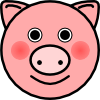

<Response [200]>

In [25]:
%%rest /image
Accept: image/png